# MNIST with CNN

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

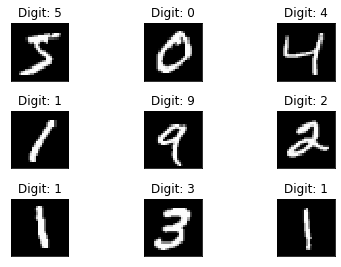

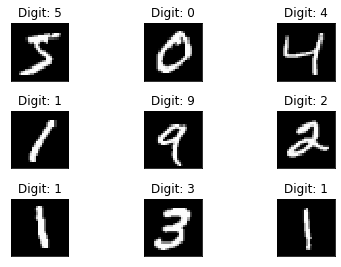

In [12]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
print('x_train shape:', x_train.shape)

In [ ]:
# The color is encoded as a number from 0 to 255
x_train[0]

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
num_classes = 10

In [ ]:
# Keras wants the picture not in a 3D tensor but in a 4D tensor
# first dimension is the different pictures
# second and third dimensions are the 28x28 x and y axis of the picture
# fourth dimension: Color channel (we only have one color (grey))
# reshape train and test data to 4D tensor
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)

In [ ]:
# gray scale is encodes an integer between 0 to 255
# the neural network needs at as a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# We rescale the tensor so that the numbers are between 0 and 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
# Let us us look at an example
img_index = 1111
print("true class:", y_train[img_index])
plt.imshow(np.reshape(x_train[img_index],(28,28)),cmap='gray')

In [ ]:
# convert class vectors to one-hot endoded binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Show the image 20 with the true class
img_index = 1111
print("true class:", y_train[img_index])
plt.imshow(np.reshape(x_train[img_index],(28,28)),cmap='gray')

In [ ]:
# Create a Sequential Model
# Add a Convolutional Layer with the 32 Kernels, each with the size 3x3, user Relu as the activation function, and define the input shape
# Add another Convolutional Layer with the 64 Kernels, each with the size 3x3, user Relu as the activation function
# Add a Max Pooling Layer with pool size of 2x2
# Add then a Dropout of 25%
# Add then a Flatten Operator to get a one dimensional vector
# Add a dense layer with 128 node and Relu activation
# Add then a Dropout of 50%
# Finally add a dense layer for the output. Think about the number of nodes and the activation function you need --> 10 because we have 10 digits and softmax
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax')) 

In [ ]:
# Compile the model
# Think about the appropiate loss function
# Use as the Optimizer Adadelta
# Add as another metric Accuracy
# TODO

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])


In [ ]:
# Fit the model
# save the learning history in a variable history
# use batch size 128, and 12 epochs
# TODO

history = model.fit(x_train, y_train, batch_size = 128, epochs = 12, validation_data = (x_test, y_test))

In [ ]:
# Test the model based on the test data
# Print the Test loss and the test accuracy
# TODO
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

print(history.history.keys())

In [ ]:
# Create a plot to show Training and Validation Accuracy
# TODO
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training accuracy', 'Validation accuracy'], loc='lower right')
plt.show()

In [ ]:
# Shows Test Pictures and predicted class
grid_x = 8
grid_y = 3
plt.figure(figsize=(1*grid_x, 2*grid_y))
for y in range(grid_y):
    for x in range(grid_x):
        index = x + (grid_x * y)
        plt_index = x + (grid_x * y)
        plt.subplot(2*grid_y, grid_x, 1+plt_index)
        img_index = index+500
        pred_data = np.reshape(x_test[img_index], (1, 28, 28, 1))
        pred = model.predict(pred_data, verbose=0)
        plt.imshow(np.reshape(x_test[img_index],(28,28)),cmap='gray')
        plt.xticks([],[])
        plt.yticks([],[])
        plt.title(str(np.argmax(pred)))
plt.tight_layout()
plt.show()

In [ ]:
# Show a Model Summary
# TODO

print (model.summary())